# K Means Clustering: Customer Segmentation Project

In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

## Data Collection

In [3]:
customer_data=pd.read_csv("Mall_Customers.csv")

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#number of rows and columns
customer_data.shape

(200, 5)

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Data Preprocessing

In [9]:
#checking missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Extract the annual income and spending score columns

In [13]:
X=customer_data.iloc[:,[3,4]].to_numpy()

In [14]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Choosing the number of clusters by elbow method

In [18]:
##find cost function for different cases

cost=[]
K=range(1,11)
for i in K:
    kmeans =  KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)


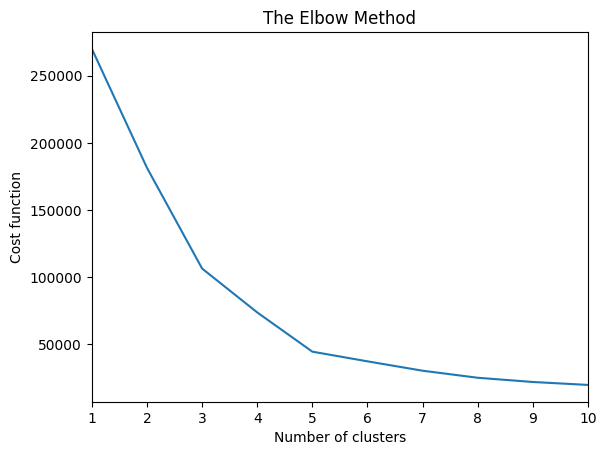

In [21]:
# create elbow plot
plt.plot(K,cost)
plt.xlim([1, 10])
plt.xlabel('Number of clusters')
plt.ylabel('Cost function')
plt.title('The Elbow Method')
plt.show()

### We choose K=5 based on the plot

# Training the K means model

In [26]:
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=0)

# Finding the clusters for each data

In [27]:
#Return label for each cluster
labels=kmeans.fit_predict(X)
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualizing the clusters

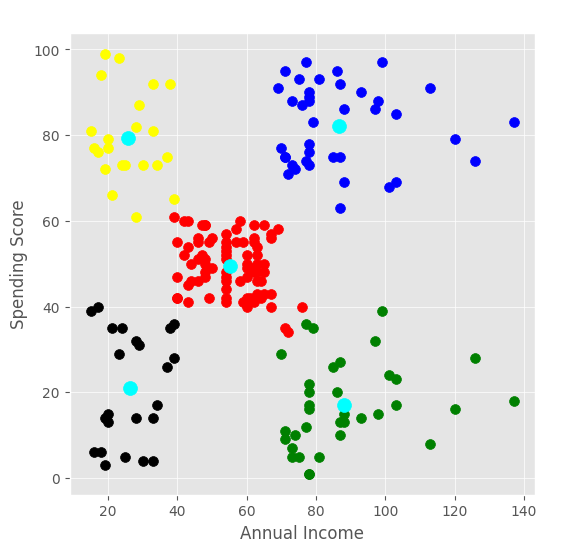

In [49]:
#Plot clustered plot with their centroids
plt.figure(figsize=(6,6))
plt.scatter(X[labels==0,0],X[labels==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[labels==1,0],X[labels==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[labels==2,0],X[labels==2,1],s=50,c='blue',label='Cluster 3')
plt.scatter(X[labels==3,0],X[labels==3,1],s=50,c='yellow',label='Cluster 4')
plt.scatter(X[labels==4,0],X[labels==4,1],s=50,c='black',label='Cluster 5')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.style.use('ggplot')
#plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')